# ĐỀ 12: Xây dựng mô hình dự đoán sức khoẻ sinh viên trên bộ dữ liệu 7

Có một câu nói nổi tiếng rằng "người có sức khỏe là có hy vọng và có hy vọng là có tất cả mọi thứ." Điều này chỉ ra một sự thật rằng sức khỏe là yếu tố chính để mở ra cánh cửa cho mọi khả năng và thành công  trong cuộc sống. Một câu khác cũng thể hiện sâu sắc về sức khỏe con người: "Người có sức khỏe thì có hàng trăm ước mơ, người không có sức khỏe thì chỉ có một ước mơ duy nhất là sức khỏe." Hai câu này đều tôn vinh giá trị quý báu của sức khỏe, là trụ cột cho mọi mục tiêu và niềm hy vọng trong cuộc sống. Đương nhiên, sức khỏe không chỉ đơn giản là việc không mắc bệnh hay không tàn phế. Theo tổ chức y tế thế giới WHO, sức khỏe là một trạng thái toàn diện, bao gồm cả thể chất, tinh thần và xã hội, nơi mà con người cảm thấy thoải mái và tự tin. Mục đích của nghiên cứu này là dự đoán sức khoẻ của sinh viên thông qua tuổi, giới tính và thói quen sử dụng điện thoại. Thông qua quá trình thu thập dữ liệu và phân tích thì có tổng cộng 18 đặc điểm trong đó có tuổi, giới tính và 16 đặc điểm liên quan đến thói quen sử dụng điện thoại của sinh viên


## **1. Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from collections import Counter
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# train test split
from sklearn.model_selection import train_test_split

# presentation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# plot
!pip install scikit-plot
import scikitplot as skplt
from google.colab import drive

# Gắn kết Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2. Load dữ liệu**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/7.-Students_Health.csv')
df.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


Với 100 hàng dữ liệu, đây là một tập dữ liệu có kích thước vừa phải, đủ để thực hiện một số phân tích cơ bản

## **3. Phân tích dữ liệu**

### **Phân tích chung**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span                  99 non-null     obj

Một số hàng dữ liệu thiếu giá trị ở một số cột. Điều này có thể ảnh hưởng đến kết quả phân tích nếu không được xử lý cẩn thận.

In [ ]:
df.isnull().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

Xử lý các giá trị thiếu: Điền vào các giá trị thiếu bằng các phương pháp xoá các hàng dữ liệu thiếu

In [ ]:
# Làm sạch dữ liệu
df = df.dropna()

In [ ]:
df['Health rating'].value_counts()

Health rating
Good                        41
Excellent                   30
Fair                        11
Excellent;Good               5
Good;Fair                    2
Poor                         1
Excellent;Good;Fair;Poor     1
Name: count, dtype: int64

### **Mã hoá dữ liệu, chia tập train, test**

In [ ]:
# Mã hoá nhãn
class_dict = {'Good': 0, 'Excellent': 1, 'Excellent;Good': 2, 'Good;Fair': 3, 'Poor': 4, 'Excellent;Good;Fair;Poor': 5, 'Excellent;Good;Fair;Poor': 6}


In [ ]:
label_encoder = LabelEncoder()

# Mã hoá các cột trong tập dữ liệu
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Gender '] = label_encoder.fit_transform(df['Gender '])
df['Mobile Phone '] = label_encoder.fit_transform(df['Mobile Phone '])
df['Mobile Operating System '] = label_encoder.fit_transform(df['Mobile Operating System '])
df['Mobile phone use for education'] = label_encoder.fit_transform(df['Mobile phone use for education'])
df['Mobile phone activities'] = label_encoder.fit_transform(df['Mobile phone activities'])
df['Helpful for studying'] = label_encoder.fit_transform(df['Helpful for studying'])
df['Educational Apps'] = label_encoder.fit_transform(df['Educational Apps'])
df['Daily usages'] = label_encoder.fit_transform(df['Daily usages'])
df['Performance impact'] = label_encoder.fit_transform(df['Performance impact'])
df['Usage distraction'] = label_encoder.fit_transform(df['Usage distraction'])
df['Attention span'] = label_encoder.fit_transform(df['Attention span'])
df['Useful features'] = label_encoder.fit_transform(df['Useful features'])
df['Health Risks'] = label_encoder.fit_transform(df['Health Risks'])
df['Beneficial subject'] = label_encoder.fit_transform(df['Beneficial subject'])
df['Usage symptoms'] = label_encoder.fit_transform(df['Usage symptoms'])
df['Symptom frequency'] = label_encoder.fit_transform(df['Symptom frequency'])
df['Health precautions'] = label_encoder.fit_transform(df['Health precautions'])

In [ ]:
df["Health rating"] = df["Health rating"].replace(class_dict)
df

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,1,1,0,0,3,2,1,0,1,0,1,1,1,2,0,2,1,3,1
1,Bilal,1,1,0,0,3,2,1,0,1,2,1,1,3,2,1,0,3,2,0
2,Hammad,1,1,0,1,3,0,1,0,1,3,2,0,1,2,1,0,3,1,1
4,Waqar,1,1,0,1,0,0,1,0,3,0,3,1,2,0,1,4,3,1,1
5,Aammar,1,1,0,0,2,0,1,0,3,2,2,1,2,1,2,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,1,1,0,1,3,0,1,0,3,0,1,1,2,2,2,2,3,2,1
96,Hafeez,0,1,0,0,3,2,1,0,1,3,0,0,3,0,2,1,3,2,0
97,Babar,0,1,0,0,3,0,1,0,0,0,3,0,2,0,2,2,1,0,1
98,Rizwan,0,1,0,0,3,0,1,0,1,0,1,0,2,2,2,2,2,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Health rating', axis=1), df['Health rating'], test_size=0.2, random_state=42)

In [ ]:
# Chia dữ liệu thành tập train và tập test
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
df_train['Health rating'].value_counts()

Health rating
0    34
1    22
6     8
2     5
3     2
5     1
Name: count, dtype: int64

In [ ]:
df_test['Health rating'].value_counts()

Health rating
1    8
0    7
6    3
4    1
Name: count, dtype: int64

### **Phân tích đơn biến**

In [ ]:
df_train.describe()

,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.958333,0.805556,0.0,0.208333,1.805556,1.194444,0.958333,0.916667,1.180556,1.347222,1.569444,0.736111,1.763889,1.472222,1.375000,1.930556,2.291667,1.166667,1.263889
std,0.515602,0.398550,0.0,0.408966,1.338897,1.843442,0.201229,1.207372,1.091922,1.445339,1.172771,0.443833,0.681611,0.786725,0.720671,1.722481,0.984922,1.138321,1.906202
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.0,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,1.000000,0.0,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000
max,3.000000,1.000000,0.0,1.000000,3.000000,6.000000,1.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,5.000000,3.000000,3.000000,6.000000


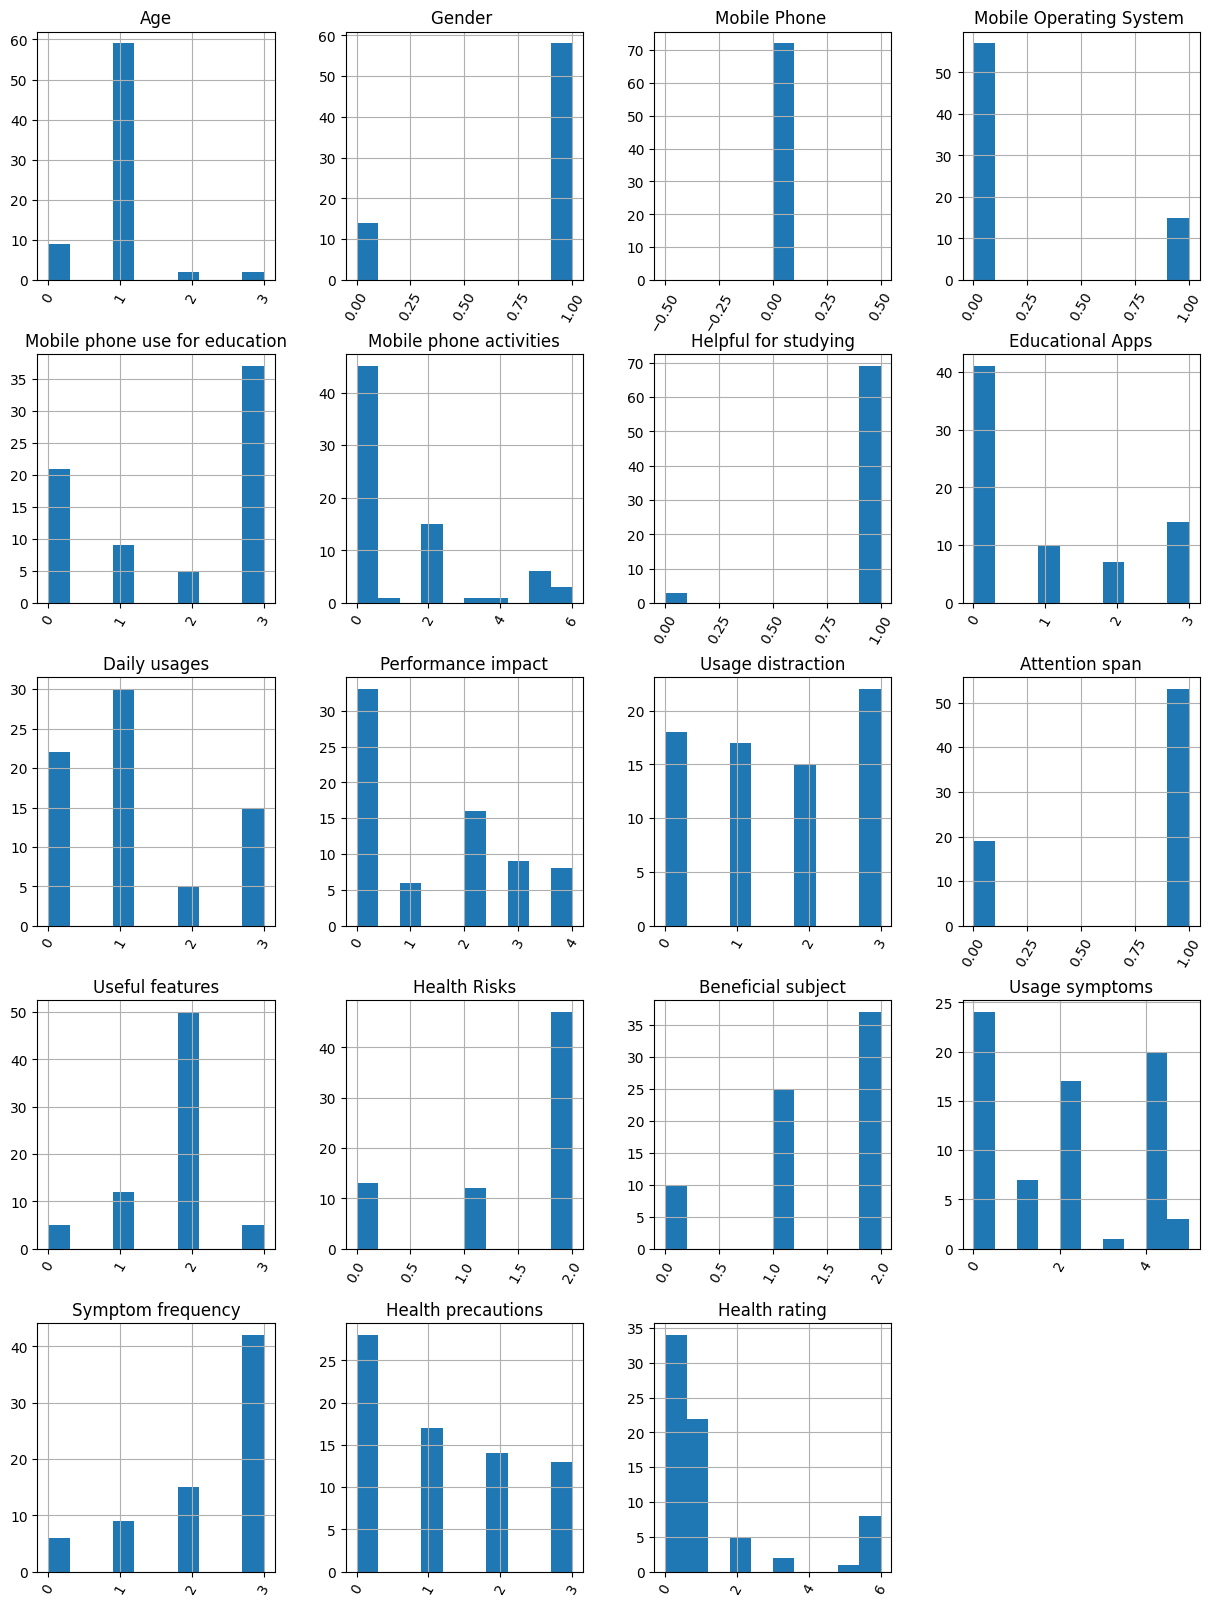

In [ ]:
df_train.hist(figsize=(15,20), xrot=60);

Age (Tuổi): Các giá trị rời rạc từ 0 đến 3 trong đó 1 chiếm nhiều nhất

Gender (Giới tính): Các giá trị nhị phân (0 hoặc 1) 1 chiếm đa số

Mobile Phone (Điện thoại di động): Chỉ có một giá trị (0).

Mobile Operating System (Hệ điều hành di động): Các giá trị nhị phân (0 hoặc 1) 0 chiếm nhiều % hơn

Mobile phone use for education (Sử dụng điện thoại di động cho giáo dục): Các giá trị rời rạc từ 0 đến 3.

Mobile phone activities (Hoạt động trên điện thoại di động): Các giá trị rời rạc từ 0 đến 6.

Helpful for studying (Hữu ích cho việc học): Các giá trị nhị phân (0 hoặc 1).

Educational Apps (Ứng dụng giáo dục): Các giá trị nhị phân (0 hoặc 1).

Daily usages (Sử dụng hàng ngày): Các giá trị rời rạc từ 0 đến 3.

Performance impact (Ảnh hưởng đến hiệu suất): Các giá trị rời rạc từ 0 đến 4.

Usage distraction (Sao nhãng do sử dụng): Các giá trị rời rạc từ 0 đến 3.

Attention span (Khả năng tập trung): Các giá trị rời rạc từ 0 đến 6.

Useful features (Các tính năng hữu ích): Các giá trị rời rạc phân bố khá đồng đều từ 0 đến 3.

Health Risks (Rủi ro sức khỏe): Các giá trị rời rạc từ 0 đến 3.

Beneficial subject (Môn học có lợi): Các giá trị rời rạc từ 0 đến 5.

Usage symptoms (Triệu chứng khi sử dụng): Các giá trị rời rạc từ 0 đến 3.

Symptom frequency (Tần suất triệu chứng): Các giá trị rời rạc từ 0 đến 3.

Health precautions (Biện pháp phòng ngừa sức khỏe): Các giá trị rời rạc từ 0 đến 4.

Health rating (Đánh giá sức khỏe): Các giá trị rời rạc từ 0 đến 6, tập trung chủ yếu ở mức 0 và 1

### **Phân tích đa biến**

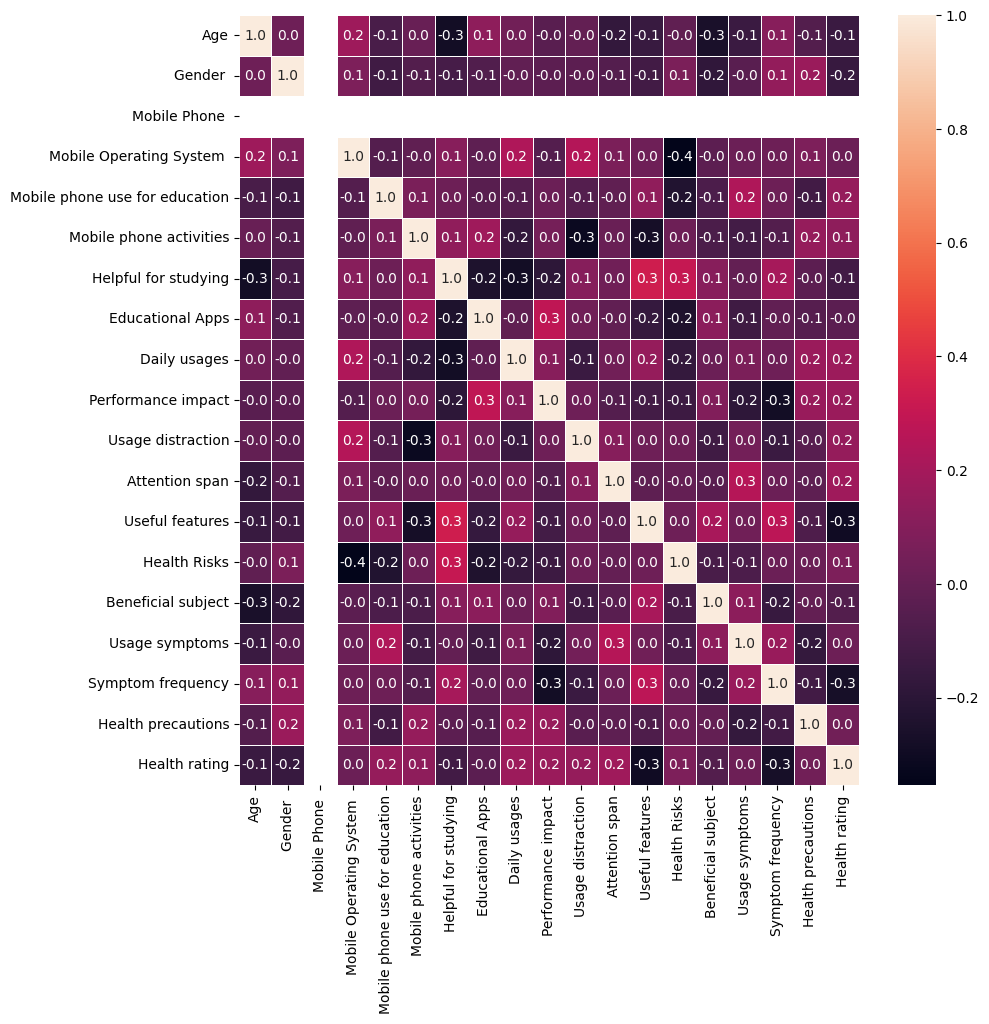

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
axes = sns.heatmap(df_train.drop('Names', axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="rocket")

Các đặc điểm có độ tương quan với nhau rất thấp trong khoảng -0.4 đến 0.3

## **4. Lựa chọn thuộc tính**

In [ ]:
print('training shape', df_test.shape)
print('testing shape', df_train.shape)

training shape (19, 20)
testing shape (72, 20)


In [ ]:
def plot_feature_importance(importance, names, model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10, 20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### **Correlation**

In [ ]:
corr_feats = list(df_train.drop('Names', axis=1).corr()[df_train.drop('Names', axis=1).corr()['Health rating']>0].index)
corr_feats.remove("Health rating")
print(len(corr_feats));

10


### **Anova**

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


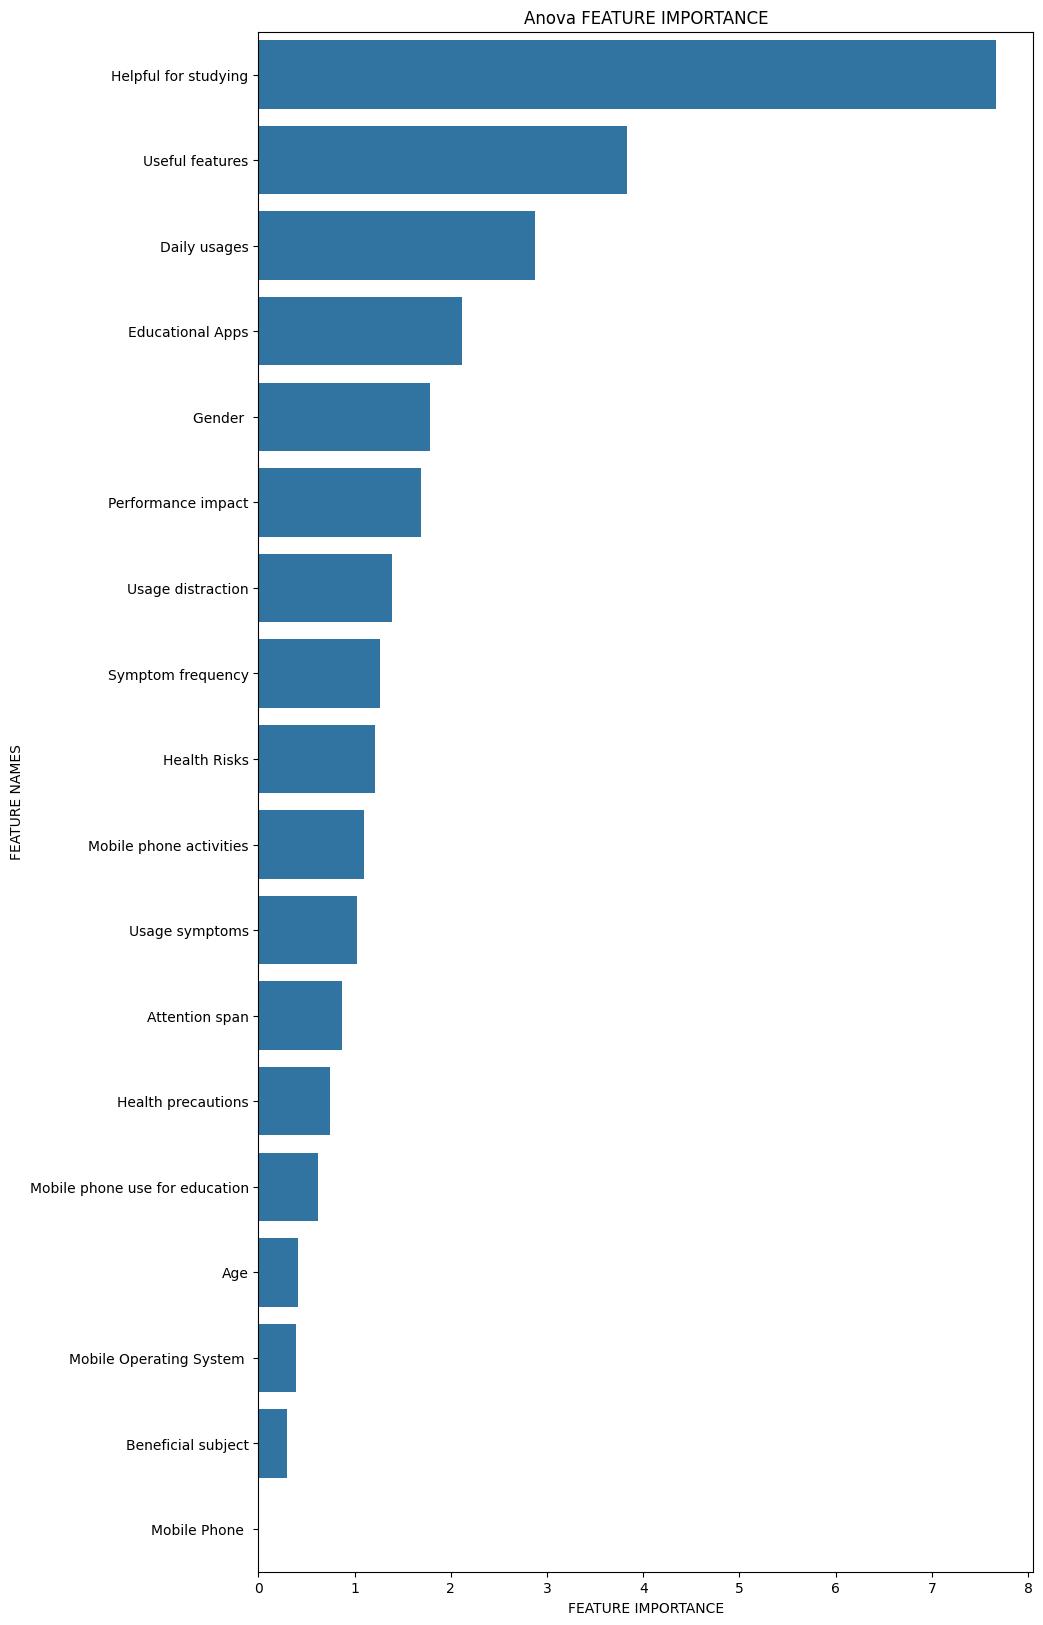

In [ ]:
from sklearn.feature_selection import f_classif
anova_scores, _ = f_classif(np.abs(X_train.drop('Names', axis=1).values), y_train)

anova_feats_score = list(zip(X_train.drop('Names', axis=1).columns, anova_scores))
anova_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in anova_feats_score],
    [i[0] for i in anova_feats_score],
    'Anova'
)

Các đặc trưng quan trọng nhất:

Helpful for studying: Đặc trưng này có ảnh hưởng lớn nhất đến biến mục tiêu. Điều này cho thấy việc sinh viên đánh giá điện thoại có hữu ích cho việc học tập hay không là một yếu tố rất quan trọng.

Useful features: Các tính năng hữu ích của điện thoại cũng đóng vai trò quan trọng. Điều này cho thấy các tính năng được thiết kế đặc biệt cho việc học tập có thể cải thiện hiệu quả học tập.

Daily usages: Tần suất sử dụng điện thoại hàng ngày cũng có ảnh hưởng đáng kể. Điều này cho thấy việc sử dụng điện thoại quá nhiều hoặc quá ít đều có thể ảnh hưởng đến kết quả.

Các đặc trưng có ảnh hưởng trung bình:

Educational Apps: Việc sử dụng các ứng dụng giáo dục cũng đóng một vai trò nhất định. Tuy nhiên, ảnh hưởng của nó không lớn bằng các đặc trưng ở trên.

Gender: Giới tính có thể có một số ảnh hưởng đến việc sử dụng điện thoại và kết quả học tập, nhưng ảnh hưởng này không quá rõ ràng.

Các đặc trưng có ảnh hưởng nhỏ:

Các đặc trưng còn lại như "Performance impact", "Usage distraction", "Symptom frequency", "Health Risks",... có ảnh hưởng tương đối nhỏ đến biến mục tiêu.

### **Dùng kết quả mô hình**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 12
[LightGBM] [Info] Start training from score -0.750306
[LightGBM] [Info] Start training from score -1.185624
[LightGBM] [Info] Start training from score -2.667228
[LightGBM] [Info] Start training from score -3.583519
[LightGBM] [Info] Start training from score -4.276666
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

TypeError: 'str' object is not callable

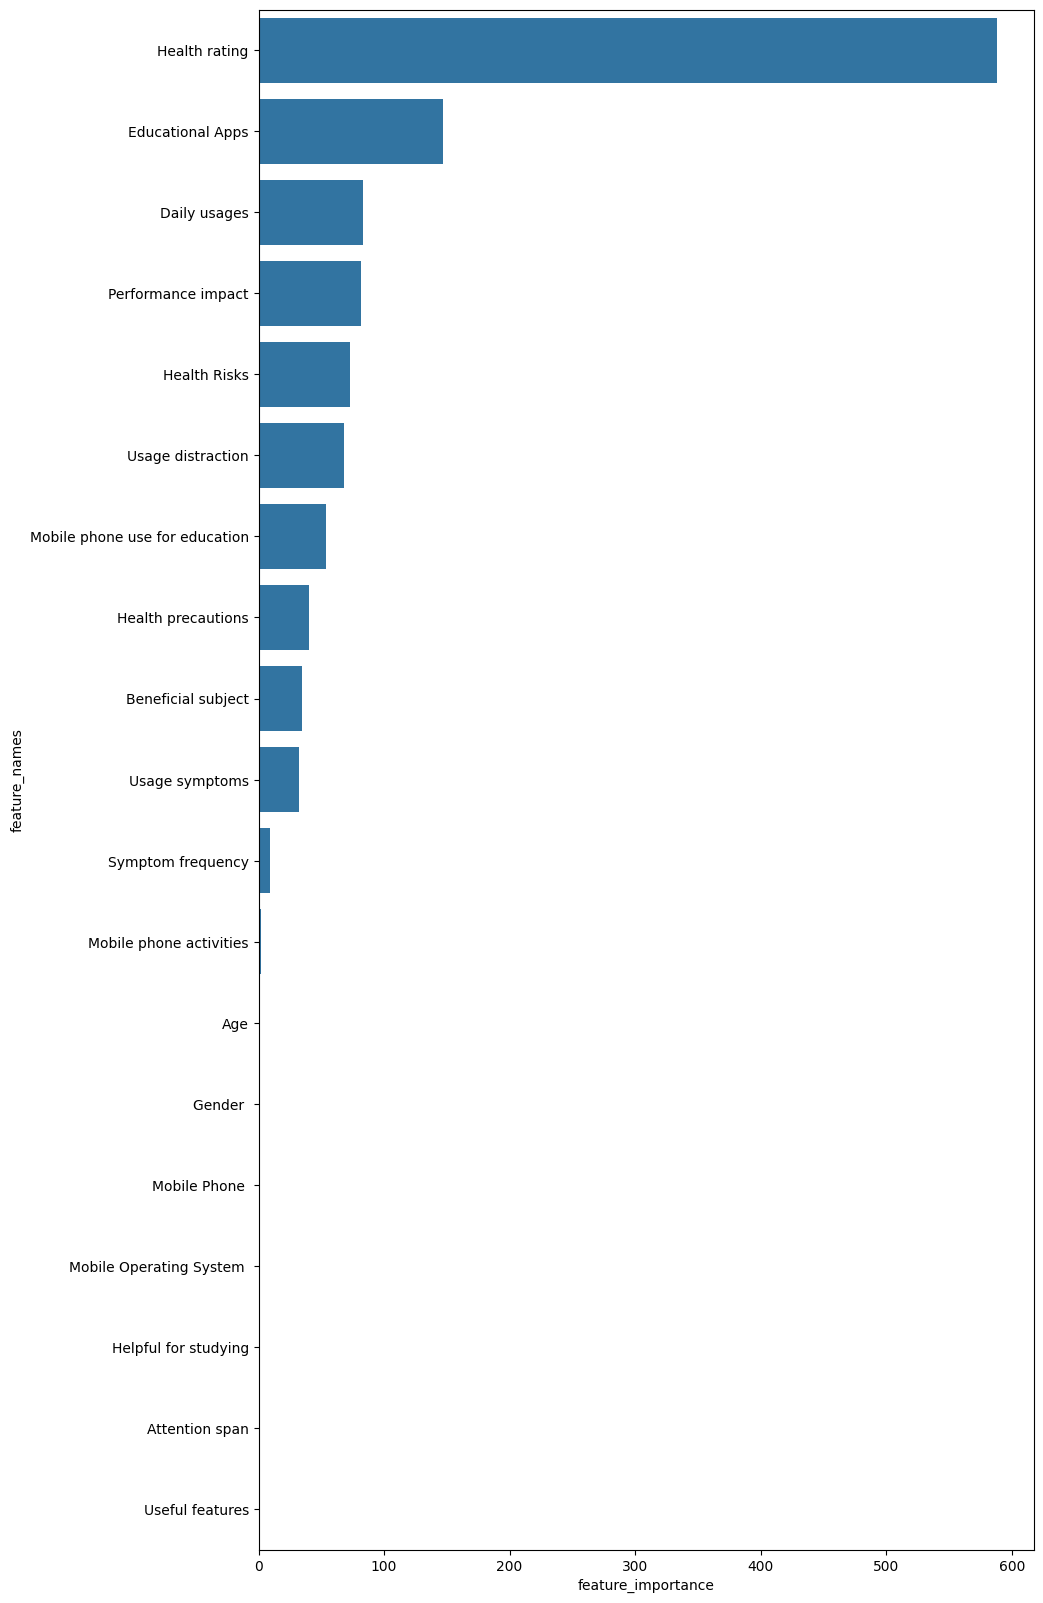

In [ ]:
# Huấn luyện mô hình
model_fi = lgb.LGBMClassifier()
model_fi.fit(
   X_train.drop('Names', axis=1), y_train
)

lgbm_scores = model_fi.feature_importances_

lgbm_feats_score = list(zip(df_train.drop('Names', axis=1).columns, lgbm_scores))
lgbm_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in lgbm_feats_score][:50],
    [i[0] for i in lgbm_feats_score][:50],
    'LGBM'
)

Các đặc trưng quan trọng nhất:

Health precautions, Usage distraction, Usage symptoms, Performance impact: Các đặc trưng liên quan đến sức khỏe và hiệu suất học tập có ảnh hưởng lớn nhất. Điều này cho thấy việc sử dụng điện thoại ảnh hưởng đáng kể đến sức khỏe và khả năng tập trung của người dùng.

Educational Apps, Daily usages, Mobile phone use for education: Các đặc trưng liên quan đến việc sử dụng điện thoại cho mục đích học tập cũng có tầm quan trọng cao. Điều này cho thấy việc sử dụng các ứng dụng học tập và tần suất sử dụng điện thoại ảnh hưởng đến hiệu quả học tập.

Các đặc trưng ít quan trọng hơn:
Beneficial subject, Mobile phone activities, Symptom frequency,....: Các đặc trưng này có ảnh hưởng tương đối nhỏ đến kết quả dự đoán.


In [ ]:
!pip install venn

<Axes: >

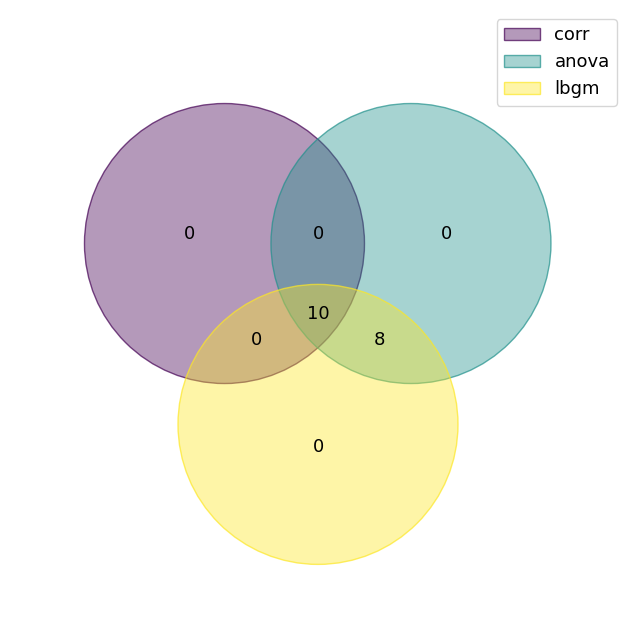

In [ ]:
from venn import venn
anova_top_20feats = [i[0] for i in anova_feats_score][:20]
lgbm_top_20feats = [i[0] for i in lgbm_feats_score][:20]

topfeature_importences = {
    'corr': set(corr_feats),
    'anova': set(anova_top_20feats),
    'lbgm': set(lgbm_top_20feats)
}

venn(topfeature_importences)

Có 10 đặc trưng được cả 3 phương pháp này đánh giá là quan trọng. Điều này cho thấy các đặc trưng này có mối liên hệ tuyến tính mạnh với biến mục tiêu và đồng thời có sự khác biệt đáng kể giữa các nhóm.

anova và lgbm: Có 8 đặc trưng được cả hai phương pháp này đánh giá là quan trọng. Điều này cho thấy các đặc trưng này không chỉ có sự khác biệt đáng kể giữa các nhóm mà còn đóng vai trò quan trọng trong việc dự đoán kết quả.

Không có đặc trưng nào được cả hai phương pháp này đánh giá là quan trọng. Điều này có thể cho thấy mối quan hệ giữa các đặc trưng và biến mục tiêu phức tạp hơn mối quan hệ tuyến tính đơn giản.

## **5. Thử nghiệm mô hình phân lớp**

### **Hàm đánh giá kết quả**

In [ ]:
# Tính các độ đo đánh giá mô hình
def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print("ACC: ", acc)
    print(classification_report(y_test,pred))


# Trực quan hoá một số thông tin
def visualize_result(model, x_test, y_test):
    y_pred = model.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True,linewidths=2,linecolor='white')

### **Các feature sử dụng**

In [ ]:
# Scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(X_train.drop('Names', axis=1))
X_trainn = scaler.transform(X_train.drop('Names', axis=1))
X_testt = scaler.transform(X_test.drop('Names', axis=1))

print('training shape', X_trainn.shape)
print('testing shape', X_testt.shape)

training shape (72, 18)
testing shape (19, 18)


### **KNN**

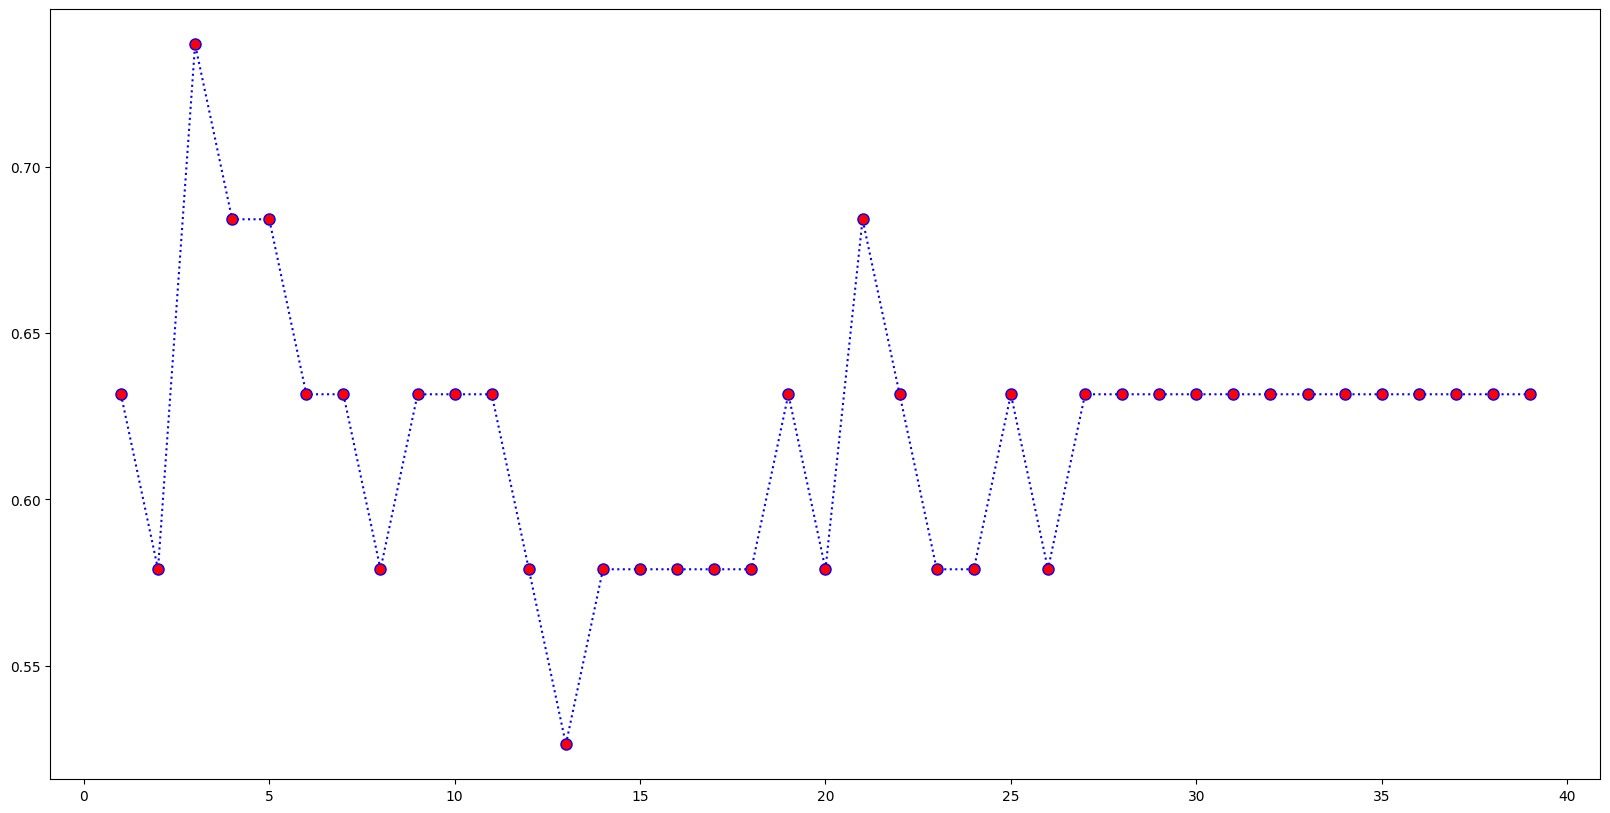

In [ ]:
err_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainn,y_train)
    pred_i = knn.predict(X_testt)
    err_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,10))
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates'
plt.xlabel = 'K Value'
plt.ylabel= 'Error Rate'
plt.show()

Với K nhỏ hơn 27: Đường biểu diễn có nhiều biến động, tăng giảm không đều. Điều này cho thấy tỷ lệ lỗi thay đổi đáng kể khi giá trị K thay đổi.
Với K lớn hơn 27: Tỷ lệ lỗi được giữ ổn định khoảng 0.63

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,n_jobs=-1)
knn.fit(X_trainn,y_train)
knnpred = knn.predict(X_testt)

ACC:  0.3157894736842105
              precision    recall  f1-score   support

           0       0.31      0.71      0.43         7
           1       0.33      0.12      0.18         8
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           0.32        19
   macro avg       0.16      0.21      0.15        19
weighted avg       0.26      0.32      0.24        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


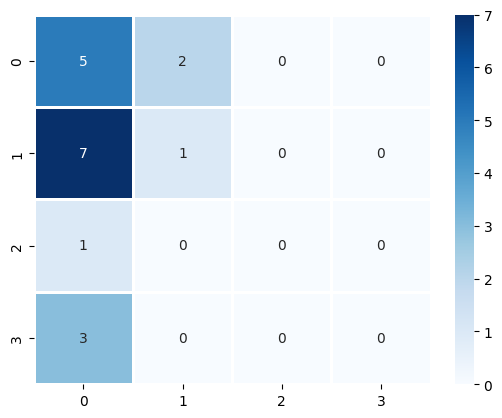

In [ ]:
evaluate(knn, X_testt, y_test)
visualize_result(knn, X_testt, y_test)

Lớp 0 có Precision và Recall cao hơn so với các lớp khác, điều này có nghĩa là mô hình phân loại lớp này tương đối tốt với tỷ lệ chính xác cao và khả năng hồi tưởng tốt.

Lớp 1 có Precision tương đối tốt (0.33) nhưng Recall thấp (0.12), cho thấy mô hình phân loại lớp này không hiệu quả trong việc phát hiện các ví dụ thực sự thuộc lớp 1.

Lớp 4 và Lớp 6 đều có Precision, Recall, và F1-Score bằng 0, cho thấy mô hình hoàn toàn không phân loại chính xác các ví dụ của các lớp này.

Mô hình hiện tại có hiệu suất phân loại kém với tỷ lệ chính xác và điểm F1-Score thấp. Đặc biệt, mô hình không phân loại chính xác các lớp ít gặp (như lớp 4 và lớp 6).

### **SVM**

In [ ]:
sup = SVC(C=10,gamma='auto',kernel='rbf')
sup.fit(X_trainn,y_train)

SVC(C=10, gamma='auto')

ACC:  0.42105263157894735
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.43      0.38      0.40         8
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3

    accuracy                           0.42        19
   macro avg       0.31      0.21      0.23        19
weighted avg       0.50      0.42      0.43        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

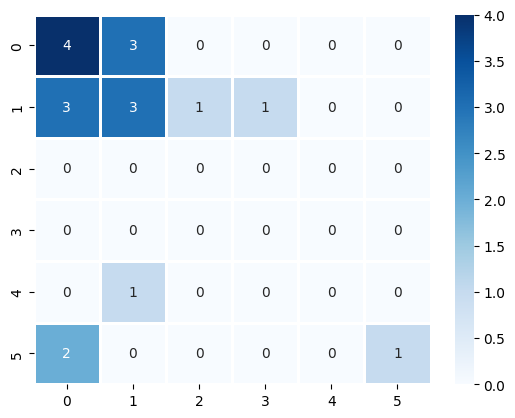

In [ ]:
evaluate(sup, X_testt, y_test)
visualize_result(sup, X_testt, y_test)

Hiệu suất của các lớp khác nhau rất khác biệt, với lớp 0 và lớp 6 đạt được điểm số tốt hơn, trong khi các lớp khác có hiệu suất kém.
Mô hình có vẻ như gặp khó khăn trong việc phân loại các lớp ít gặp (như lớp 2, 3 và 4) và có sự mất cân bằng dữ liệu.


### **Logistic regression**

In [ ]:
logr = LogisticRegression(C=1,max_iter=150,multi_class='auto')
logr.fit(X_trainn,y_train)

LogisticRegression(C=1, max_iter=150)

ACC:  0.3684210526315789
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.40      0.25      0.31         8
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.33      0.33      0.33         3

    accuracy                           0.37        19
   macro avg       0.24      0.23      0.23        19
weighted avg       0.38      0.37      0.37        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

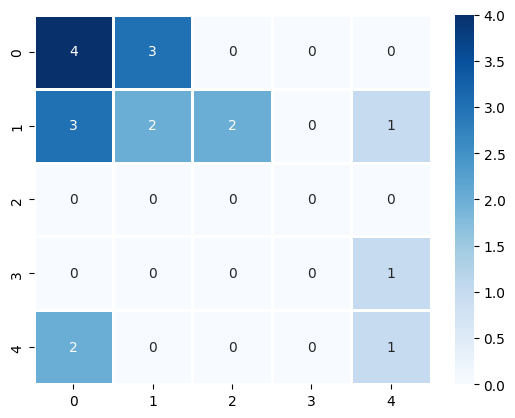

In [ ]:
evaluate(logr, X_testt, y_test)
visualize_result(logr, X_testt, y_test)

Hiệu suất của lớp: Lớp 0 vẫn có hiệu suất tốt nhất, nhưng các lớp khác (như lớp 1 và lớp 6) có hiệu suất kém hơn. Các lớp ít gặp (như lớp 2 và 4) không được phân loại chính xác, có thể do số lượng mẫu quá nhỏ.

### **Gradient Boosting Classifier**

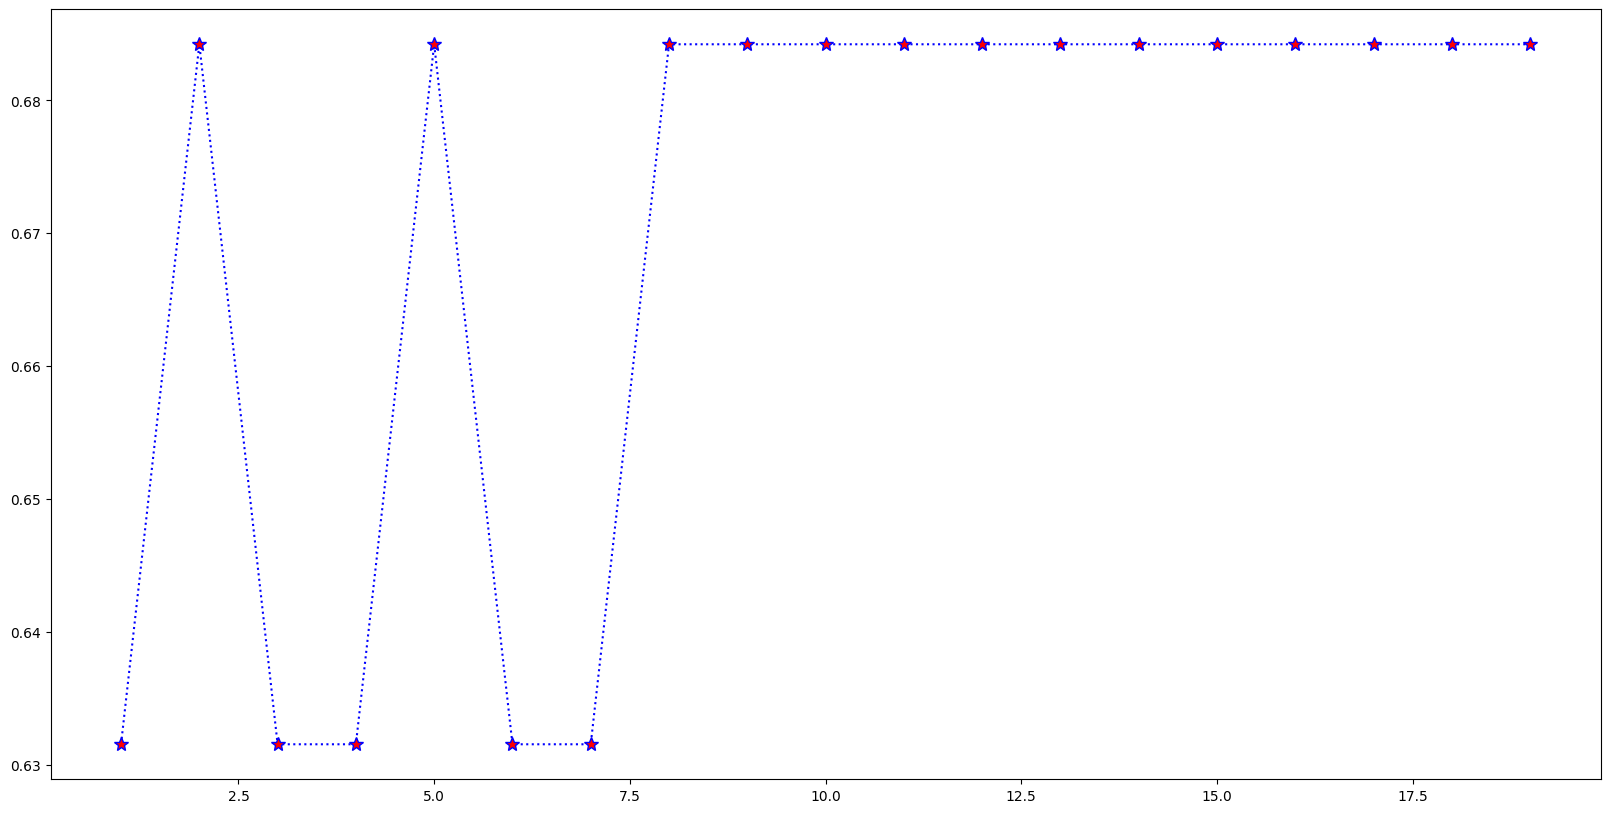

In [ ]:
err = []

for i in range(1,20):
    clf = GradientBoostingClassifier(n_estimators=i*10, learning_rate=1.0,max_depth=1)
    clf.fit(X_trainn,y_train)
    errpred = clf.predict(X_testt)
    err.append(np.mean(errpred != y_test))


plt.figure(figsize=(20,10))
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='*',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators'
plt.ylabel= 'Error Rate'
plt.show()

Với ước lượng nhỏ hơn 8 thì tỷ lệ lỗi biến động rất lớn

Với ước lượng lớn hơn 8 thì tỷ lệ lỗi được giữ ổn định không thay đổi khoảng 0.7

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=110, learning_rate=1.0,max_depth=1)
GBC.fit(X_trainn,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=110)

ACC:  0.3157894736842105
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3

    accuracy                           0.32        19
   macro avg       0.27      0.17      0.19        19
weighted avg       0.39      0.32      0.32        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

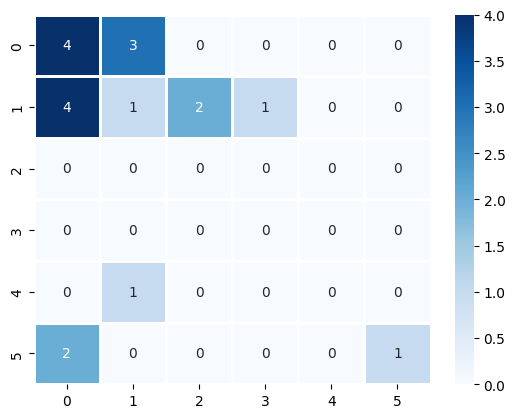

In [ ]:
evaluate(GBC, X_testt, y_test)
visualize_result(GBC, X_testt, y_test)

Hiệu suất của lớp: Lớp 0 và lớp 6 đạt được điểm số tốt hơn so với các lớp khác, nhưng các lớp khác (như lớp 1, 2, 3, và 4) có hiệu suất rất thấp.

### **Random forest classifier**

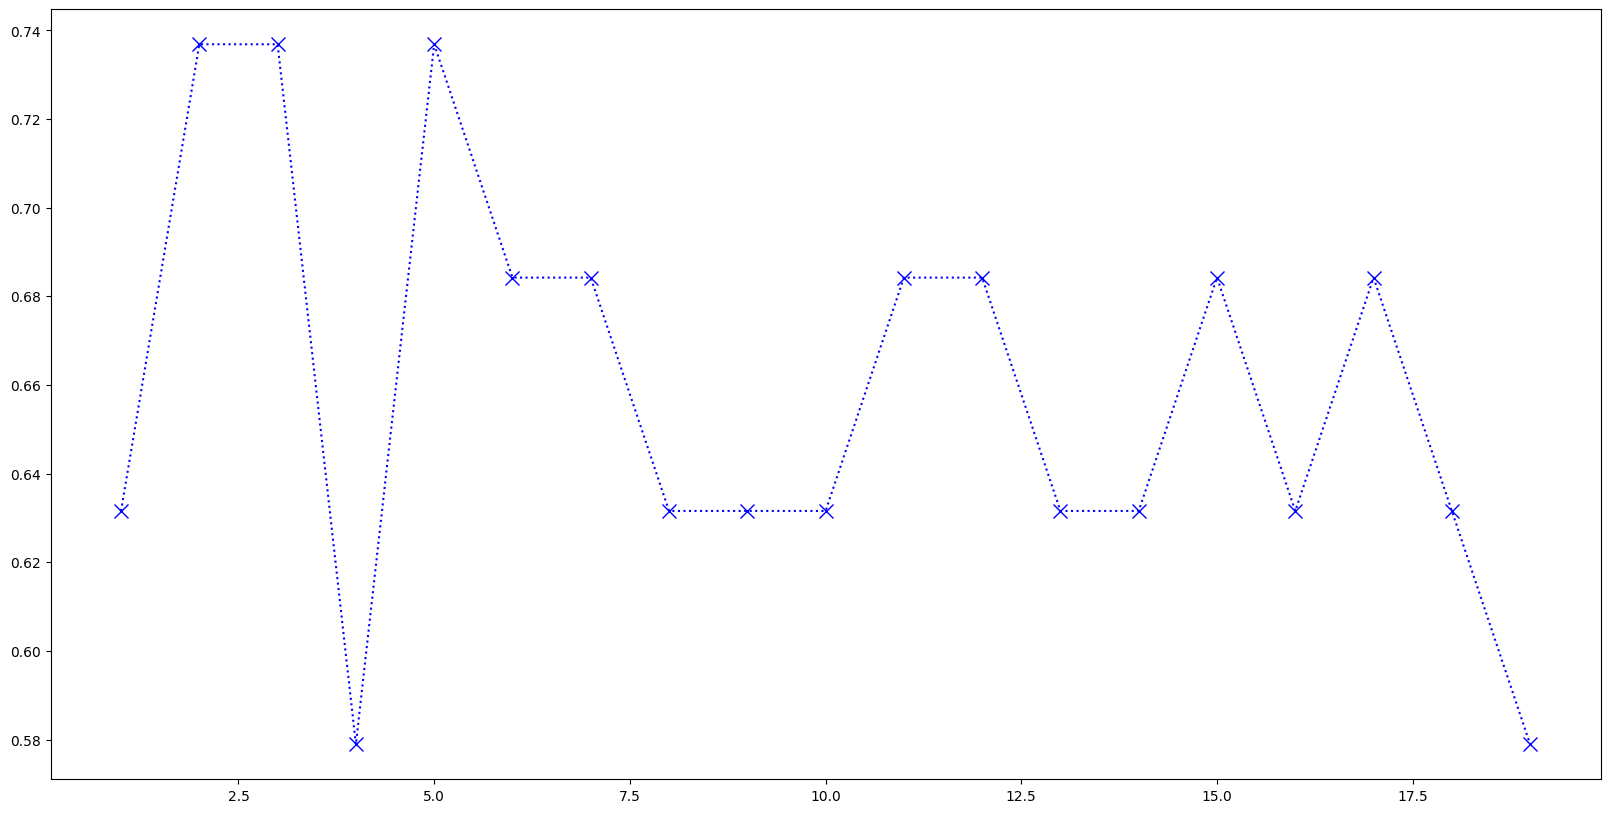

In [ ]:
err = []

for i in range(1,20):
    rfe = RandomForestClassifier(n_estimators=i*10)
    rfe.fit(X_trainn,y_train)
    errpred = rfe.predict(X_testt)
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10))
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators'
plt.ylabel= 'Error Rate'
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators=150,max_features='auto',max_depth=8)
rfc.fit(X_trainn,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=150)

ACC:  0.42105263157894735
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.43      0.38      0.40         8
           4       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3

    accuracy                           0.42        19
   macro avg       0.45      0.32      0.34        19
weighted avg       0.47      0.42      0.41        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


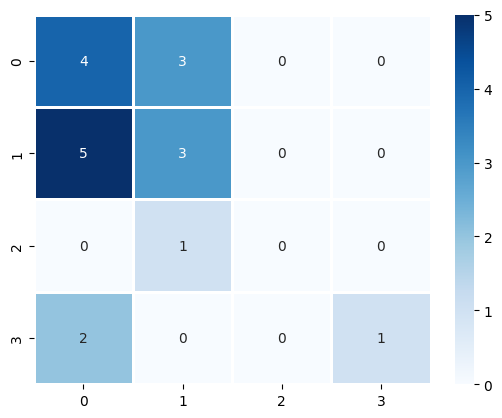

In [ ]:
evaluate(rfc, X_testt, y_test)
visualize_result(rfc, X_testt, y_test)

Hiệu suất của lớp: Lớp 0 và lớp 6 đạt được điểm số tốt hơn so với các lớp khác, nhưng lớp 4 vẫn có hiệu suất kém.
Tổng quan mô hình: Mô hình có độ chính xác tổng thể là 42%, cho thấy sự cải thiện so với các phiên bản trước và đạt được hiệu suất tốt hơn trong việc phân loại các lớp.


### Trong các mô hình thì Random forest và SVM cho ra tỷ lệ accuracy cao nhất là 42%, con số này không cao **do tập dữ liệu còn quá nhỏ**. Do đó mô hình mang tính chất tham khảo!

## **6. Phân tích lỗi**

In [ ]:
def show_error(model, x_test, y_test):
    y_pred = model.predict(x_test)
    error_df = X_test
    error_df['Class'] = y_test
    error_df['Pred'] = y_pred
    error_df = error_df.sort_values(by=['Class','Pred'], ascending=True)
    return error_df

In [ ]:
error = show_error(rfc, X_test.drop('Names', axis=1)[lgbm_top_20feats], y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
data = X_train
data['Health rating'] = y_train

In [ ]:
data[data["Health rating"] == 1].describe()

,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,1.000000,0.909091,0.0,0.181818,1.545455,1.500000,0.909091,1.545455,1.681818,1.818182,1.409091,0.727273,1.681818,1.363636,1.500000,1.636364,2.318182,1.454545,1.0
std,0.534522,0.294245,0.0,0.394771,1.262170,2.154729,0.294245,1.438494,1.286796,1.789822,1.053750,0.455842,0.646335,0.789542,0.672593,1.619684,0.994574,1.223861,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,0.0,0.000000,0.250000,0.000000,1.000000,0.000000,0.250000,0.000000,1.000000,0.250000,2.000000,1.000000,1.000000,0.000000,1.250000,0.250000,1.0
50%,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.500000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.0
75%,1.000000,1.000000,0.0,0.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.750000,2.000000,1.000000,2.000000,2.000000,2.000000,2.750000,3.000000,3.000000,1.0
max,3.000000,1.000000,0.0,1.000000,3.000000,6.000000,1.000000,3.000000,3.000000,4.000000,3.000000,1.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.0


In [ ]:
data[data["Health rating"] == 2].describe()

,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,5.000000,5.0,5.0,5.000000,5.000000,5.00000,5.0,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.0
mean,0.800000,1.0,0.0,0.400000,2.000000,2.40000,1.0,0.600000,1.200000,0.600000,0.80000,0.600000,1.200000,1.600000,1.20000,0.800000,2.400000,0.80000,2.0
std,0.447214,0.0,0.0,0.547723,1.414214,2.50998,0.0,0.894427,1.095445,0.894427,0.83666,0.547723,1.095445,0.894427,0.83666,1.095445,0.894427,1.30384,0.0
min,0.000000,1.0,0.0,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000,2.0
25%,1.000000,1.0,0.0,0.000000,1.000000,0.00000,1.0,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.00000,0.000000,2.000000,0.00000,2.0
50%,1.000000,1.0,0.0,0.000000,3.000000,2.00000,1.0,0.000000,1.000000,0.000000,1.00000,1.000000,2.000000,2.000000,1.00000,0.000000,3.000000,0.00000,2.0
75%,1.000000,1.0,0.0,1.000000,3.000000,5.00000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000,2.00000,2.000000,3.000000,1.00000,2.0
max,1.000000,1.0,0.0,1.000000,3.000000,5.00000,1.0,2.000000,3.000000,2.000000,2.00000,1.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.00000,2.0


In [ ]:
error[(error["Pred"]==1) & (error["Class"]==2)]

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,...,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Class,Pred
